# NetworkX Package in Python

### 1. An Intro to NetworkX

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np

### 2. Creating Graphs

#### 2.1 Creating Graphs using Built-in Generators

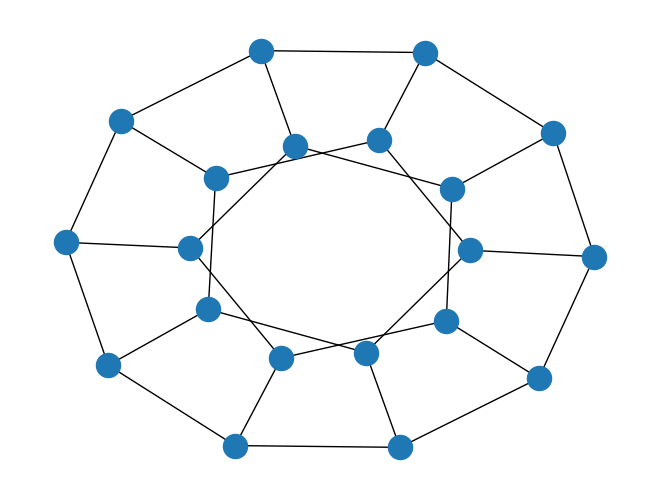

In [10]:
# Dodecahedron graph
G = nx.dodecahedral_graph()
nx.draw(G)

In [11]:
# Checking some common parameters and properties of the graph using a function
def graph_stats(G):
    print("Number of nodes \t= ", G.number_of_nodes())
    print("Number of edges \t= ", G.number_of_edges())
    print("Number of components \t= ", len(list(nx.connected_components(G))))
    print("Is planar \t\t=", nx.is_planar(G))
    print("Is bipartite \t\t=", nx.is_bipartite(G))

In [12]:
#checking the graph stats by calling the function
graph_stats(G)

Number of nodes 	=  20
Number of edges 	=  30
Number of components 	=  1
Is planar 		= True
Is bipartite 		= False


Number of nodes 	=  50
Number of edges 	=  98
Number of components 	=  1
Is planar 		= True
Is bipartite 		= False


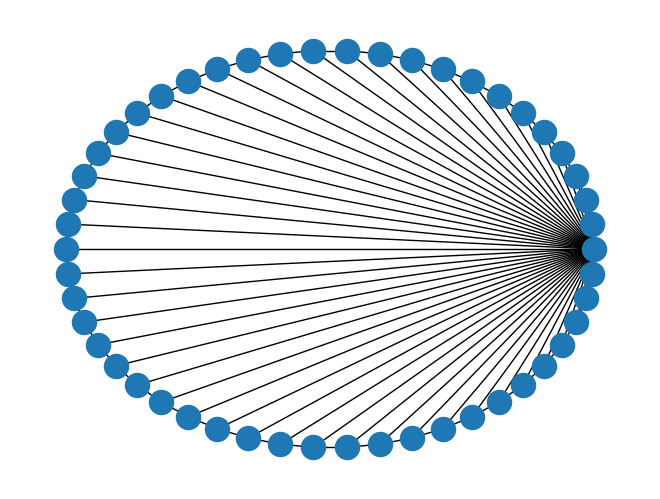

In [13]:
#Writing more builtin function example
G = nx.wheel_graph(50)
graph_stats(G)
nx.draw_circular(G)

#### 2.2 Creating Graphs by Adding Nodes and Edges One By One

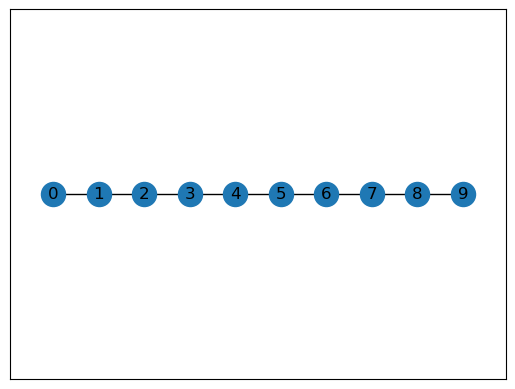

In [14]:
"""
First we are giving the path using a position dictionary to align it and then we are repeating the same using list comprehension.
"""
N = 10
P10 = nx.Graph()
nodes = range(N)
edges = [(n, n+1) for n in range (N-1)]# here we are creating a list of tuples using list comprehension where each tuple is a pair of nodes in the graph and the nodes are connected by an edge. 
positions = {node:(node, 0) for node in nodes}# here we are creating a dictionary using list comprehension where each node is assigned a position in the graph.
P10.add_nodes_from(nodes)
P10.add_edges_from(edges)
nx.draw_networkx(P10, pos=positions, with_labels=True)# here we are drawing the graph using the positions dictionary.

##### Task 1: Create and n x n grid, and draw it like a grid and try it using list comprehension

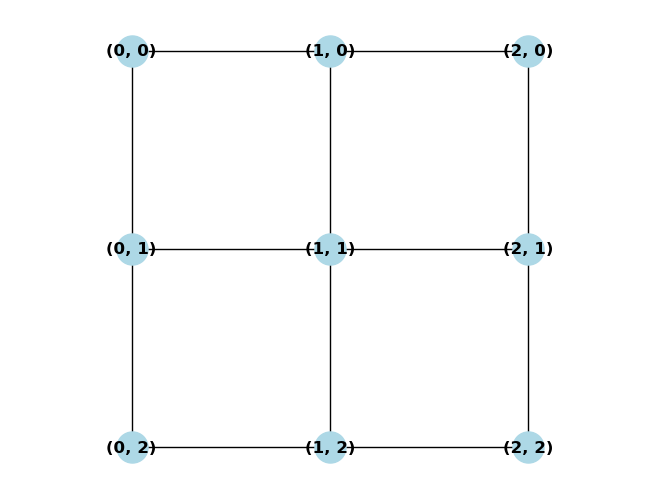

In [15]:
def create_grid_graph(n):
    #Creating an empty graph
    G = nx.Graph()
    
    # Generating nodes as (i, j) tuples using list comprehension
    nodes = [(i, j) for i in range(n) for j in range(n)]
    G.add_nodes_from(nodes)
    
    #Generating horizontal and vertical edgest using the list comprehension
    horizontal_edges = [((i, j), (i+1, j))
                        for i in range(n-1) for j in range(n)]
    vertical_edges = [((i, j), (i, j+1)) for i in range(n) for j in range(n-1)]
    G.add_edges_from(horizontal_edges + vertical_edges)

    return G

def draw_grid_graph(G, n):
    # assigning position to nodes to form a grid layout
    pos  = {(i, j): (i,-j) for i in range(n) for j in range(n)}
    
    # Drawing the graph
    nx.draw(G, pos, with_labels=True, node_size=500,
            node_color='lightblue', font_weight='bold')
    plt.axis('equal')  # Ensuring aspect ratio is square
    plt.show()

# Creating a 3X3 grid graph
n = 3
grid_graph = create_grid_graph(n)
draw_grid_graph(grid_graph, n)
    
    

#### 2.3 Creating Graphs from Pandas Dataframe

In [16]:
#Reading the data from a file of game of thrones
df = pd.read_csv("/Users/adityamishra/Documents/Machine Learning Tutorial/1. Machine Learning Specialisation/Important-ML-Implementations/8-NetworkX/data/got-edges.csv")
df.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
